# Child exposure to diseases caused by suboptimal breastfeeding

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Theory" data-toc-modified-id="Theory-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Theory</a></span></li><li><span><a href="#Data-download" data-toc-modified-id="Data-download-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data download</a></span><ul class="toc-item"><li><span><a href="#Cause-data" data-toc-modified-id="Cause-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cause data</a></span></li><li><span><a href="#Risk-specific-data" data-toc-modified-id="Risk-specific-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Risk-specific data</a></span></li></ul></li><li><span><a href="#Load-and-clean-data" data-toc-modified-id="Load-and-clean-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load and clean data</a></span><ul class="toc-item"><li><span><a href="#Cause-data" data-toc-modified-id="Cause-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cause data</a></span></li><li><span><a href="#Risk-data" data-toc-modified-id="Risk-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Risk data</a></span></li></ul></li><li><span><a href="#Calculating-risk-specific-prevalence" data-toc-modified-id="Calculating-risk-specific-prevalence-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calculating risk-specific prevalence</a></span><ul class="toc-item"><li><span><a href="#YLD-vs.-YLL-vs.-DALY" data-toc-modified-id="YLD-vs.-YLL-vs.-DALY-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>YLD vs. YLL vs. DALY</a></span></li><li><span><a href="#Calculating-exposure" data-toc-modified-id="Calculating-exposure-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Calculating exposure</a></span></li></ul></li></ul></div>

## Theory
We are interested in the number of newborns exposed to suboptimal breastfeeding. Unfortunately, GBD does not disclose any exposure data. Instead, they offer cause prevalence data (individuals affected by a disease measured in number, YLD, YLL or DALY) and risk-specific cause data (individuals affected by a disease caused by a risk-factor measured in YLD, YLL or DALY). We will attempt to approximate exposure (measured in number of individuals exposed) from these data. 

First, we first calculate risk-specific prevalences, i.e. the number of disease cases that can be attributed to a specific risk factor. Because GBD offers different measures of prevalence, we have three options:

$ P_{c,r} = P_{c} * \dfrac{YLD_{c,r}}{YLD_{c}} $

$ P_{c,r} = P_{c} * \dfrac{YLL_{c,r}}{YLL_{c}} $

$ P_{c,r} = P_{c} * \dfrac{DALY_{c,r}}{DALY_{c}} $

where $P_{c}$ is the prevalence of disease c (in GBD language: cause c), $YLD_c$ is the number of YLD caused by cause c, and $YLD_{c,r}$ is the number of YLD caused by cause c attributable to risk factor r. The notations for YLL and DALY are analogous to YLD.

## Data download

### Cause data

Cause-Prevalence data ($P_c$, $YLL_c$, $YLD_c$, $DALY_c$), are available from the [GBD website](http://ghdx.healthdata.org/gbd-results-tool). We will download the data automatically using the Python library [ddf_tools](https://github.com/semio/ddf_utils). The GBD codes that comprise the query can be looked up [here](http://ghdx.healthdata.org/sites/all/modules/custom/ihme_query_tool/gbd-search/php/metadata/).

In [1]:
from ddf_utils.factory.ihme import IHMELoader
import pathlib
import zipfile
import shutil

# make output directory
outdir = pathlib.Path('data')
outdir.mkdir(exist_ok=True)

# get loader and metadata
GBD = IHMELoader()
metadata = GBD.load_metadata()

# choose version: latest
version = metadata['version']['id'].max()

# choose locations: all but 'custom'
locations_md = metadata['location']
locations = locations_md[locations_md['id'] != 'custom']['id'].tolist()

# download cause data
zippath = GBD.bulk_download(
    version = version, # which version of the data to use
    out_dir = outdir, # where to save the data
    context = 'cause', # GBD nomenclature for 'diseases'
    age = [2,3,4,5], # early neonatal, late neonatal, postneonatal, 1-4 years
    location = locations, # all locations
    sex = 3, # both male and female
    year = 2011, # year
    metric = 1, # number of cases
    measure = [2,3,4,5], # daly, yld, yll, incidence
    cause = [302, 322], # diarrhea, lower respiratory infections
    idsOrNames = 'both', # include plain text descriptions of the codes in the results file
)

working on https://s3.healthdata.org/gbd-api-2019-public/be12c64a804d524dcf5a4101782dfe22
check status as http://ghdx.healthdata.org/gbd-results-tool/result/be12c64a804d524dcf5a4101782dfe22
available downloads:
https://s3.healthdata.org:443/gbd-api-2019-public/be12c64a804d524dcf5a4101782dfe22_files/IHME-GBD_2019_DATA-be12c64a-1.zip
downloading https://s3.healthdata.org:443/gbd-api-2019-public/be12c64a804d524dcf5a4101782dfe22_files/IHME-GBD_2019_DATA-be12c64a-1.zip to data\be12c64a\IHME-GBD_2019_DATA-be12c64a-1.zip
begin downloading data\be12c64a\IHME-GBD_2019_DATA-be12c64a-1.zip...


816kB [00:01, 643kB/s]                                                                                                 


In [2]:
# unzip the downloaded file
fullzippath = outdir / zippath[0]
with zipfile.ZipFile(next(fullzippath.glob('*.zip')), 'r') as f:
    files = f.namelist()
    f.extractall(outdir)
    
# delete zip archive and parent folder
shutil.rmtree(fullzippath)

# fetch extracted file name
cause_file = outdir / [f for f in files if '.csv' in f][0]
cause_file

WindowsPath('data/IHME-GBD_2019_DATA-be12c64a-1.csv')

### Risk-specific data

Risk-specific data ($YLD_{r,c}$, $YLL_{r,c}$, $DALY_{r,c}$) are available from the same API. Unforunately, the ddf_utils library contains a bug that we need to fix before we can download the data.

In [3]:
from ddf_utils.factory.ihme import IHMELoader
from ddf_utils.chef.helpers import read_opt

def _corrected_make_query(self, context, version, **kwargs):
        """generate a query with the context, version and all keyword arguments.

        if a parameter is mandatory but not provided, it will fill
        with default values.

        """
        # metadata
        if not self.metadata:
            self.load_metadata()

        metadata = self.metadata
        ages = metadata['age']['id'].values
        # location: there is a `custom` location. don't include that one.
        locations_md = metadata['location']
        locations = locations_md[locations_md['id'] != 'custom']['id'].tolist()
        sexs = metadata['sex']['id'].tolist()
        years = metadata['year']['id'].tolist()
        metrics = metadata['metric']['id'].tolist()
        measures = metadata['measure']['id'].tolist()
        causes = metadata['cause']['id'].tolist()
        # risk/etiology/impairment
        # There are actually 4 types data in this dictionary:
        # risk, etiology, impairment and injury n-codes.
        # however injury n-codes is not enabled.
        # we might need to take of it later.
        rei = metadata['rei']
        # risks = rei[rei['type'] == 'risk']['rei_id'].values
        # etiologys = rei[rei['type'] == 'etiology']['rei_id'].values
        # impairments = rei[rei['type'] == 'impairment']['rei_id'].values

        # others metadata filed not include:
        # - groups
        # - year_range

        queries = {}

        # create query base on context and user input
        if context == 'le':
            measure = read_opt(kwargs, 'measure', default=26)
            metric = read_opt(kwargs, 'metric', default=5)
            cause = read_opt(kwargs, 'cause', default=causes)
            queries.update({
                'measure[]': measure,
                'metric[]': metric,
                'cause[]': cause
            })
        elif context == 'cause':
            measure = read_opt(kwargs, 'measure', default=measures)
            metric = read_opt(kwargs, 'metric', default=[1, 2, 3])
            cause = read_opt(kwargs, 'cause', default=causes)
            queries.update({
                'measure[]': measure,
                'metric[]': metric,
                'cause[]': cause
            })
        elif context in ['risk', 'etiology', 'impairment']:
            # TODO: should be split, don't combine these context here.
            measure = read_opt(kwargs, 'measure', default=measures)
            metric = read_opt(kwargs, 'metric', default=[1, 2, 3])
            context_values = rei[rei['type'] == context]['id'].tolist() ################
            context_values = read_opt(kwargs, 'rei_id', default=[1, 2, 3]) ##################
            cause = read_opt(kwargs, 'cause', default=causes)
            queries.update({
                'measure[]': measure,
                'metric[]': metric,
                context+'[]':context_values,
                'rei[]': context_values,
                'cause[]':  cause
            })
        else:
            # SEV/HALE/haqi
            print('not supported context.')
            raise NotImplementedError

        # insert context and version and other configs
        rows = read_opt(kwargs, 'rows', default=10000000)  # the maximum records we can get
        # ^ Note: user guide[1] says it's 500000 row. But actually we can set this to 10000000
        # [1]: http://www.healthdata.org/sites/default/files/files/Data_viz/GBD_2017_Tools_Overview.pdf
        email = read_opt(kwargs, 'email', default='downloader@gapminder.org')
        idsOrNames = read_opt(kwargs, 'idsOrNames', default='ids')           # ids / names / both
        singleOrMult = read_opt(kwargs, 'singleOrMult', default='multiple')  # single / multiple
        base = read_opt(kwargs, 'base', default='single')

        location = read_opt(kwargs, 'location', default=locations)
        age = read_opt(kwargs, 'age', default=ages)
        sex = read_opt(kwargs, 'sex', default=sexs)
        year = read_opt(kwargs, 'year', default=years)

        queries.setdefault('context', context)
        queries.setdefault('version', version)
        queries.setdefault('rows', rows)
        queries.setdefault('email', email)
        queries.setdefault('idsOrNames', idsOrNames)
        queries.setdefault('singleOrMult', singleOrMult)
        queries.setdefault('base', base)
        queries.setdefault('location[]', location)
        queries.setdefault('age[]', age)
        queries.setdefault('sex[]', sex)
        queries.setdefault('year[]', year)

        return queries
    
IHMELoader._make_query = _corrected_make_query

In [4]:
# download risk-specific data
zippath = GBD.bulk_download(
    version = version, # which version of the data to use
    out_dir = outdir, # where to save the data
    context = 'risk', # GBD nomenclature for 'diseases'
    age = [2,3,4,5], # early neonatal, late neonatal, postneonatal, 1-4 years
    location = locations, # all locations
    sex = 3, # both male and female
    year = 2011, # year
    metric = 1, # number of cases
    measure = [2,3,4], # daly, yld, yll (no prevalence available)
    cause = [302, 322], # diarrhea, lower respiratory infections
    rei_id = [136, 137], # non-exclusive breastfeeding, discontinued breastfeeding
    idsOrNames = 'both', # include plain text descriptions of the codes in the results file
)

working on https://s3.healthdata.org/gbd-api-2019-public/659c2316c834cfb8244c8cefdc4628bb
check status as http://ghdx.healthdata.org/gbd-results-tool/result/659c2316c834cfb8244c8cefdc4628bb
available downloads:
https://s3.healthdata.org:443/gbd-api-2019-public/659c2316c834cfb8244c8cefdc4628bb_files/IHME-GBD_2019_DATA-659c2316-1.zip
downloading https://s3.healthdata.org:443/gbd-api-2019-public/659c2316c834cfb8244c8cefdc4628bb_files/IHME-GBD_2019_DATA-659c2316-1.zip to data\659c2316\IHME-GBD_2019_DATA-659c2316-1.zip
begin downloading data\659c2316\IHME-GBD_2019_DATA-659c2316-1.zip...


478kB [00:01, 451kB/s]                                                                                                 


In [5]:
# unzip the downloaded file
fullzippath = outdir / zippath[0]
with zipfile.ZipFile(next(fullzippath.glob('*.zip')), 'r') as f:
    files = f.namelist()
    f.extractall(outdir)
    
# delete zip archive and parent folder
shutil.rmtree(fullzippath)

# fetch extracted file name
risk_file = outdir / [f for f in files if '.csv' in f][0]
risk_file

WindowsPath('data/IHME-GBD_2019_DATA-659c2316-1.csv')

## Load and clean data

### Cause data

In [6]:
# load cause data
import pandas as pd

df_cause = pd.read_csv(cause_file)
df_cause

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,4,YLLs (Years of Life Lost),67,Japan,3,Both,2,Early Neonatal,302,Diarrheal diseases,1,Number,2011,69.033674,76.183135,58.028415
1,4,YLLs (Years of Life Lost),67,Japan,3,Both,3,Late Neonatal,302,Diarrheal diseases,1,Number,2011,180.218561,222.943105,136.541365
2,4,YLLs (Years of Life Lost),67,Japan,3,Both,4,Post Neonatal,302,Diarrheal diseases,1,Number,2011,1816.582776,2020.018154,1601.250103
3,4,YLLs (Years of Life Lost),67,Japan,3,Both,5,1 to 4,302,Diarrheal diseases,1,Number,2011,1985.316770,2230.198753,1747.728976
4,4,YLLs (Years of Life Lost),67,Japan,3,Both,2,Early Neonatal,322,Lower respiratory infections,1,Number,2011,531.197510,587.936649,448.027001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,5,Prevalence,35440,Ishikawa,3,Both,5,1 to 4,302,Diarrheal diseases,1,Number,2011,20.338392,28.227613,14.082740
21596,5,Prevalence,35440,Ishikawa,3,Both,2,Early Neonatal,322,Lower respiratory infections,1,Number,2011,1.201336,1.496299,0.949697
21597,5,Prevalence,35440,Ishikawa,3,Both,3,Late Neonatal,322,Lower respiratory infections,1,Number,2011,1.793935,2.122410,1.513424
21598,5,Prevalence,35440,Ishikawa,3,Both,4,Post Neonatal,322,Lower respiratory infections,1,Number,2011,15.925677,18.657651,13.490323


Let's drop the id columns for a better overview (except the location ids, which we need to differentiate between locations of the same name). Also, let's rename the other columns to something nicer.

In [7]:
drop_cols = ['measure_id', 'sex_id', 'age_id', 'cause_id', 'metric_id', 'metric_name']
rename_cols = {
    'measure_name': 'measure',
    'location_name': 'location',
    'sex_name':'sex',
    'age_name': 'ages',
    'cause_name': 'cause',
    'rei_name': 'risk'
}
rename_measures={
    'YLLs (Years of Life Lost)':'YLL',
    'YLDs (Years Lived with Disability)': 'YLD',
    'DALYs (Disability-Adjusted Life Years)': 'DALY',
}
df_cause = df_cause.drop(columns=drop_cols).rename(columns=rename_cols)
df_cause['measure'].replace(rename_measures, inplace=True)

df_cause

,measure,location_id,location,sex,ages,cause,year,val,upper,lower
0,YLL,67,Japan,Both,Early Neonatal,Diarrheal diseases,2011,69.033674,76.183135,58.028415
1,YLL,67,Japan,Both,Late Neonatal,Diarrheal diseases,2011,180.218561,222.943105,136.541365
2,YLL,67,Japan,Both,Post Neonatal,Diarrheal diseases,2011,1816.582776,2020.018154,1601.250103
3,YLL,67,Japan,Both,1 to 4,Diarrheal diseases,2011,1985.316770,2230.198753,1747.728976
4,YLL,67,Japan,Both,Early Neonatal,Lower respiratory infections,2011,531.197510,587.936649,448.027001
...,...,...,...,...,...,...,...,...,...,...
21595,Prevalence,35440,Ishikawa,Both,1 to 4,Diarrheal diseases,2011,20.338392,28.227613,14.082740
21596,Prevalence,35440,Ishikawa,Both,Early Neonatal,Lower respiratory infections,2011,1.201336,1.496299,0.949697
21597,Prevalence,35440,Ishikawa,Both,Late Neonatal,Lower respiratory infections,2011,1.793935,2.122410,1.513424
21598,Prevalence,35440,Ishikawa,Both,Post Neonatal,Lower respiratory infections,2011,15.925677,18.657651,13.490323


Next, let's melt the 'val' / 'lower' / 'upper' columns into an 'estimate' and a 'value' column.

In [8]:
df_cause = df_cause.melt(
        id_vars=['measure', 'location_id', 'location', 'sex', 'ages', 'cause', 'year'],
        var_name='estimate',
    )

df_cause

,measure,location_id,location,sex,ages,cause,year,estimate,value
0,YLL,67,Japan,Both,Early Neonatal,Diarrheal diseases,2011,val,69.033674
1,YLL,67,Japan,Both,Late Neonatal,Diarrheal diseases,2011,val,180.218561
2,YLL,67,Japan,Both,Post Neonatal,Diarrheal diseases,2011,val,1816.582776
3,YLL,67,Japan,Both,1 to 4,Diarrheal diseases,2011,val,1985.316770
4,YLL,67,Japan,Both,Early Neonatal,Lower respiratory infections,2011,val,531.197510
...,...,...,...,...,...,...,...,...,...
64795,Prevalence,35440,Ishikawa,Both,1 to 4,Diarrheal diseases,2011,lower,14.082740
64796,Prevalence,35440,Ishikawa,Both,Early Neonatal,Lower respiratory infections,2011,lower,0.949697
64797,Prevalence,35440,Ishikawa,Both,Late Neonatal,Lower respiratory infections,2011,lower,1.513424
64798,Prevalence,35440,Ishikawa,Both,Post Neonatal,Lower respiratory infections,2011,lower,13.490323


Lastly, let's separate the prevalence numbers ($P_c$) from the other measures ($YLL_c$, $YLD_c$, $DALY_c$).

In [9]:
df_prevalence = df_cause.query("measure=='Prevalence'")
df_prevalence

,measure,location_id,location,sex,ages,cause,year,estimate,value
16200,Prevalence,110,Dominica,Both,Early Neonatal,Diarrheal diseases,2011,val,0.367450
16201,Prevalence,110,Dominica,Both,Late Neonatal,Diarrheal diseases,2011,val,2.357251
16202,Prevalence,110,Dominica,Both,Post Neonatal,Diarrheal diseases,2011,val,34.338314
16203,Prevalence,110,Dominica,Both,1 to 4,Diarrheal diseases,2011,val,69.949927
16204,Prevalence,111,Dominican Republic,Both,Early Neonatal,Lower respiratory infections,2011,val,78.189441
...,...,...,...,...,...,...,...,...,...
64795,Prevalence,35440,Ishikawa,Both,1 to 4,Diarrheal diseases,2011,lower,14.082740
64796,Prevalence,35440,Ishikawa,Both,Early Neonatal,Lower respiratory infections,2011,lower,0.949697
64797,Prevalence,35440,Ishikawa,Both,Late Neonatal,Lower respiratory infections,2011,lower,1.513424
64798,Prevalence,35440,Ishikawa,Both,Post Neonatal,Lower respiratory infections,2011,lower,13.490323


In [10]:
df_cause = df_cause.query('measure!="Prevalence"')
df_cause

,measure,location_id,location,sex,ages,cause,year,estimate,value
0,YLL,67,Japan,Both,Early Neonatal,Diarrheal diseases,2011,val,69.033674
1,YLL,67,Japan,Both,Late Neonatal,Diarrheal diseases,2011,val,180.218561
2,YLL,67,Japan,Both,Post Neonatal,Diarrheal diseases,2011,val,1816.582776
3,YLL,67,Japan,Both,1 to 4,Diarrheal diseases,2011,val,1985.316770
4,YLL,67,Japan,Both,Early Neonatal,Lower respiratory infections,2011,val,531.197510
...,...,...,...,...,...,...,...,...,...
59395,YLD,4618,North East England,Both,1 to 4,Diarrheal diseases,2011,lower,112.556061
59396,YLD,4618,North East England,Both,Early Neonatal,Lower respiratory infections,2011,lower,0.312346
59397,YLD,4618,North East England,Both,Late Neonatal,Lower respiratory infections,2011,lower,0.339378
59398,YLD,4618,North East England,Both,Post Neonatal,Lower respiratory infections,2011,lower,1.808545


### Risk data

We repeat the same procedure for the risk data.

In [11]:
# load raw data
df_risk = pd.read_csv(risk_file)
df_risk

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,rei_id,rei_name,metric_id,metric_name,year,val,upper,lower
0,4,YLLs (Years of Life Lost),1,Global,3,Both,3,Late Neonatal,302,Diarrheal diseases,136,Non-exclusive breastfeeding,1,Number,2011,2.213902e+06,2.849573e+06,1.640471e+06
1,4,YLLs (Years of Life Lost),1,Global,3,Both,4,Post Neonatal,302,Diarrheal diseases,136,Non-exclusive breastfeeding,1,Number,2011,1.107695e+07,1.439672e+07,7.994893e+06
2,4,YLLs (Years of Life Lost),1,Global,3,Both,4,Post Neonatal,302,Diarrheal diseases,137,Discontinued breastfeeding,1,Number,2011,5.776440e+05,1.032806e+06,2.060606e+05
3,4,YLLs (Years of Life Lost),1,Global,3,Both,5,1 to 4,302,Diarrheal diseases,137,Discontinued breastfeeding,1,Number,2011,6.392838e+05,1.149958e+06,2.114072e+05
4,4,YLLs (Years of Life Lost),1,Global,3,Both,3,Late Neonatal,322,Lower respiratory infections,136,Non-exclusive breastfeeding,1,Number,2011,2.192082e+06,3.309606e+06,1.195051e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12145,2,DALYs (Disability-Adjusted Life Years),44788,Torbay,3,Both,4,Post Neonatal,302,Diarrheal diseases,136,Non-exclusive breastfeeding,1,Number,2011,2.143155e+00,3.248053e+00,1.333773e+00
12146,2,DALYs (Disability-Adjusted Life Years),44788,Torbay,3,Both,4,Post Neonatal,302,Diarrheal diseases,137,Discontinued breastfeeding,1,Number,2011,7.219010e-01,1.351723e+00,2.458406e-01
12147,2,DALYs (Disability-Adjusted Life Years),44788,Torbay,3,Both,5,1 to 4,302,Diarrheal diseases,137,Discontinued breastfeeding,1,Number,2011,6.614654e-01,1.335070e+00,2.077514e-01
12148,2,DALYs (Disability-Adjusted Life Years),44774,Isle of Wight,3,Both,3,Late Neonatal,322,Lower respiratory infections,136,Non-exclusive breastfeeding,1,Number,2011,1.747283e-01,2.593348e-01,1.039277e-01


In [12]:
# rename columns
df_risk['measure_name'].replace(rename_measures, inplace=True)

# melt estimates
df_risk = df_risk.\
    drop(columns=drop_cols+['rei_id']).\
    rename(columns=rename_cols).\
    melt(
        id_vars=['measure', 'location_id', 'location', 'sex', 'ages', 'cause', 'year', 'risk'],
        var_name='estimate'
    )

df_risk

,measure,location_id,location,sex,ages,cause,year,risk,estimate,value
0,YLL,1,Global,Both,Late Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,val,2.213902e+06
1,YLL,1,Global,Both,Post Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,val,1.107695e+07
2,YLL,1,Global,Both,Post Neonatal,Diarrheal diseases,2011,Discontinued breastfeeding,val,5.776440e+05
3,YLL,1,Global,Both,1 to 4,Diarrheal diseases,2011,Discontinued breastfeeding,val,6.392838e+05
4,YLL,1,Global,Both,Late Neonatal,Lower respiratory infections,2011,Non-exclusive breastfeeding,val,2.192082e+06
...,...,...,...,...,...,...,...,...,...,...
36445,DALY,44788,Torbay,Both,Post Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,lower,1.333773e+00
36446,DALY,44788,Torbay,Both,Post Neonatal,Diarrheal diseases,2011,Discontinued breastfeeding,lower,2.458406e-01
36447,DALY,44788,Torbay,Both,1 to 4,Diarrheal diseases,2011,Discontinued breastfeeding,lower,2.077514e-01
36448,DALY,44774,Isle of Wight,Both,Late Neonatal,Lower respiratory infections,2011,Non-exclusive breastfeeding,lower,1.039277e-01


## Calculating risk-specific prevalence

Before we can apply the formulae from the introduction, we need to match the location- and age group-specific cause- and risk-data. First, we match $YLL_c$, $YLD_c$, $DALY_c$ with $YLL_{c,r}$, $YLD_{c,r}$, $DALY_{c,r}$:

In [13]:
df_risk_cause = df_risk.merge(
    df_cause, 
    how='outer', 
    on=['location_id','location','year','sex','ages','cause','measure'], 
    suffixes=('_risk','_cause')
)

df_risk_cause

,measure,location_id,location,sex,ages,cause,year,risk,estimate_risk,value_risk,estimate_cause,value_cause
0,YLL,1,Global,Both,Late Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,val,2.213902e+06,val,4.677587e+06
1,YLL,1,Global,Both,Late Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,val,2.213902e+06,upper,5.694902e+06
2,YLL,1,Global,Both,Late Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,val,2.213902e+06,lower,3.793404e+06
3,YLL,1,Global,Both,Late Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,upper,2.849573e+06,val,4.677587e+06
4,YLL,1,Global,Both,Late Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,upper,2.849573e+06,upper,5.694902e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
127570,YLD,4618,North East England,Both,Early Neonatal,Lower respiratory infections,2011,NaN,NaN,NaN,upper,7.599097e-01
127571,YLD,4618,North East England,Both,Early Neonatal,Lower respiratory infections,2011,NaN,NaN,NaN,lower,3.123462e-01
127572,YLD,4618,North East England,Both,1 to 4,Lower respiratory infections,2011,NaN,NaN,NaN,val,6.299188e+00
127573,YLD,4618,North East England,Both,1 to 4,Lower respiratory infections,2011,NaN,NaN,NaN,upper,9.874345e+00


Next, we match the prevalence numbers $P_c$:

In [14]:
df_risk_cause = df_risk_cause.\
    rename(columns={'measure':'measure_risk_cause'}).\
    merge(
        df_prevalence.drop(columns='measure'),
        how='outer', 
        on=['location_id','location','year','sex','ages','cause'],
    ).\
    rename(
        columns={'estimate':'estimate_prevalence', 'value':'value_prevalence'}
    )

df_risk_cause

,measure_risk_cause,location_id,location,sex,ages,cause,year,risk,estimate_risk,value_risk,estimate_cause,value_cause,estimate_prevalence,value_prevalence
0,YLL,1,Global,Both,Late Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,val,2.213902e+06,val,4.677587e+06,val,280221.248215
1,YLL,1,Global,Both,Late Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,val,2.213902e+06,val,4.677587e+06,upper,304872.583614
2,YLL,1,Global,Both,Late Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,val,2.213902e+06,val,4.677587e+06,lower,255016.302789
3,YLL,1,Global,Both,Late Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,val,2.213902e+06,upper,5.694902e+06,val,280221.248215
4,YLL,1,Global,Both,Late Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,val,2.213902e+06,upper,5.694902e+06,upper,304872.583614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382720,YLD,44778,South Gloucestershire,Both,1 to 4,Lower respiratory infections,2011,NaN,NaN,NaN,upper,1.170756e+00,upper,14.100846
382721,YLD,44778,South Gloucestershire,Both,1 to 4,Lower respiratory infections,2011,NaN,NaN,NaN,upper,1.170756e+00,lower,8.028466
382722,YLD,44778,South Gloucestershire,Both,1 to 4,Lower respiratory infections,2011,NaN,NaN,NaN,lower,3.186603e-01,val,10.624555
382723,YLD,44778,South Gloucestershire,Both,1 to 4,Lower respiratory infections,2011,NaN,NaN,NaN,lower,3.186603e-01,upper,14.100846


Now we can apply the formulae. Note that the differentiation between different measures (YLD, YLL, DALY) is implicit in the the table rows so we do not need to account for it separately.

In [15]:
df_risk_cause['prevalence_risk'] = df_risk_cause['value_prevalence'] * df_risk_cause['value_risk'] / df_risk_cause['value_cause']

df_risk_cause

,measure_risk_cause,location_id,location,sex,ages,cause,year,risk,estimate_risk,value_risk,estimate_cause,value_cause,estimate_prevalence,value_prevalence,prevalence_risk
0,YLL,1,Global,Both,Late Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,val,2.213902e+06,val,4.677587e+06,val,280221.248215,132628.727589
1,YLL,1,Global,Both,Late Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,val,2.213902e+06,val,4.677587e+06,upper,304872.583614,144296.205584
2,YLL,1,Global,Both,Late Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,val,2.213902e+06,val,4.677587e+06,lower,255016.302789,120699.225946
3,YLL,1,Global,Both,Late Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,val,2.213902e+06,upper,5.694902e+06,val,280221.248215,108936.436834
4,YLL,1,Global,Both,Late Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,val,2.213902e+06,upper,5.694902e+06,upper,304872.583614,118519.680997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382720,YLD,44778,South Gloucestershire,Both,1 to 4,Lower respiratory infections,2011,NaN,NaN,NaN,upper,1.170756e+00,upper,14.100846,NaN
382721,YLD,44778,South Gloucestershire,Both,1 to 4,Lower respiratory infections,2011,NaN,NaN,NaN,upper,1.170756e+00,lower,8.028466,NaN
382722,YLD,44778,South Gloucestershire,Both,1 to 4,Lower respiratory infections,2011,NaN,NaN,NaN,lower,3.186603e-01,val,10.624555,NaN
382723,YLD,44778,South Gloucestershire,Both,1 to 4,Lower respiratory infections,2011,NaN,NaN,NaN,lower,3.186603e-01,upper,14.100846,NaN


### YLD vs. YLL vs. DALY

Let's have a look at the result. We filter for the 'Global' prevalence of 'Diarrheal diseases' within the 'Post Neonatal' age group attributed to the risk factor 'Discontinued breastfeeding'. To keep it simple, we inspect 'val' estimates only.

In [16]:
query = "location=='Global' & cause=='Diarrheal diseases' & ages=='Post Neonatal'" +\
        "& estimate_cause=='val' & estimate_risk=='val' & estimate_prevalence=='val'" +\
        "& risk=='Discontinued breastfeeding'"
df_risk_cause.query(query)[['measure_risk_cause','prevalence_risk']].values

array([['YLL', 73097.06555306481],
       ['YLD', 125700.98773238061],
       ['DALY', 73856.51388181357]], dtype=object)

Corresponding to the three formulae, we get one estimate for each measure YLD, YLL and DALY. While YLL and DALY yield a similar value, using YLD yields a +70% higher estimate. It is not know to the authors why the three measures yield different estimates. However, we can accept the differences if their variance is smaller than the variance already contained in the dataset (e.g. in the form of the estimates val, lower, upper). To confirm this, let's compare the distribution of risk-specific prevalences (our calculation result) to that of the unspecific cause prevalences (downloaded data). Note that both distributions are log-normal, so we take the log10 before plotting and calculating their variance:

{'risk': {'mean': 1.5991704670066902, 'var': 2.0670509112758144},
 'cause': {'mean': 2.3306671330733675, 'var': 2.3390394466165016}}

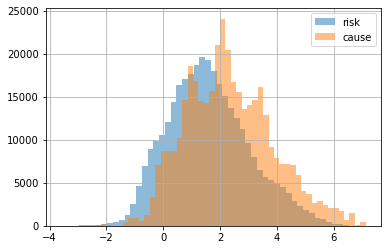

In [17]:
import matplotlib.pyplot as plt
import numpy as np

mean_var = {}
for label, col in zip(['risk', 'cause'],['prevalence_risk', 'value_prevalence']):
    normalized = np.log10(df_risk_cause[col])
    mean_var[label] = {'mean':normalized.mean(), 'var':normalized.var()}
    normalized.hist(alpha=0.5, bins=50, label=label)
    
plt.legend()
mean_var

As expected, total cause numbers are on average higher than risk-specific cause numbers. Apart from this, the variance in the risk-specific data is lower than in the cause data. This means our calculation did not introduce additional uncertainty (at least on average). 

We can use our approach to estimate risk-specific cause prevalences without introducing additional uncertainty. But which of the three measures (YLD, YLL, DALY) should we use? Let's compare the three approaches:

{'YLD': {'mean': 1.6002616178508797, 'var': 2.0723871034005734},
 'YLL': {'mean': 1.5989314839306552, 'var': 2.066927884114937},
 'DALY': {'mean': 1.598318299238536, 'var': 2.061873578870419}}

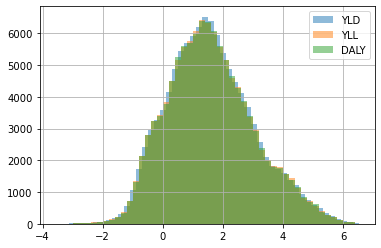

In [18]:
df_pivot = df_risk_cause.pivot(
    index=['location_id','location','year','sex','ages','cause','risk','estimate_cause','estimate_risk','estimate_prevalence'],
    columns='measure_risk_cause',
    values='prevalence_risk',
)

mean_var = {}
for measure in ['YLD', 'YLL', 'DALY']:
    normalized = np.log10(df_pivot[measure])
    mean_var[measure] = {'mean':normalized.mean(), 'var':normalized.var()}
    normalized.hist(alpha=0.5, bins=50, label=measure)
    
plt.legend()
mean_var

All three measures yield the same distribution of risk-specific prevalences. This means, on average, they yield the same result. Nevertheless, values can vary significantly for individual locations, age groups or risk factors, as we saw before. To understand these individual differences better, let's look at the distribution of the relative deviations ($\dfrac{P_{c,r,YLD}-P_{c,r,YLL}}{P_{c,r,YLD}}$, $\dfrac{P_{c,r,YLD}-P_{c,r,DALY}}{P_{c,r,DALY}}$ and $\dfrac{P_{c,r,YLY}-P_{c,r,DALY}}{P_{c,r,YLL}}$) over all data points:

{'(YLD-YLL)/YLD': count    109350.000000
 mean          0.026372
 std           0.255749
 min          -0.881404
 25%          -0.066886
 50%           0.000606
 75%           0.075576
 max           7.424321
 dtype: float64,
 '(YLD-DALY)/YLD': count    109350.000000
 mean          0.024057
 std           0.229502
 min          -0.877975
 25%          -0.064596
 50%           0.000501
 75%           0.077823
 max           7.061630
 dtype: float64,
 '(YLL-DALY)/YLL': count    109350.000000
 mean          0.004535
 std           0.082954
 min          -0.679156
 25%          -0.007031
 50%          -0.000007
 75%           0.008113
 max           2.128778
 dtype: float64}

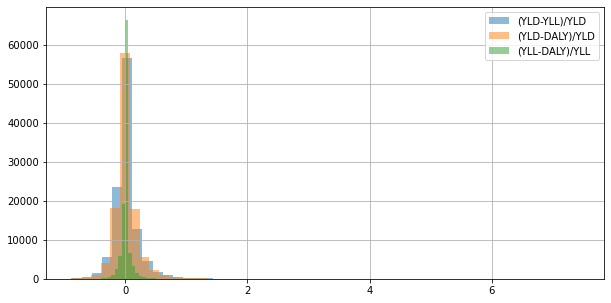

In [19]:
rel_diff = {}
descriptions = {}
for pair in [('YLD','YLL'), ('YLD','DALY'), ('YLL','DALY')]:
    label = f"({pair[0]}-{pair[1]})/{pair[0]}"
    rel_diff[label] = (df_pivot[pair[0]]-df_pivot[pair[1]])/df_pivot[pair[1]]
    rel_diff[label].hist(alpha=0.5, bins=50, label=label, figsize=(10,5))
    descriptions[label] = rel_diff[label].describe()

plt.legend()
descriptions

The histogram and the summary statistics show that YLL and DALY yield very similar estimates. The average deviation between both approaches is 0.4%. Half of all data points show a deviation < +-1%. The maximum deviation is presented by a YLL-estimate (we will use this as a short-hand for "risk-specific prevalence estimate that is calculated using YLL as shown in above formula") that is 3 times higher than the corresponding DALY estimate. 

Because YLL and DALY yield similar results, it is sufficient to compare YLD to YLL estimates. Here, deviations are larger and YLD yields 2% higher estimates on average. Half of the YLL values lie within an +-7% error band around the YLD estimates. The maximum deviation is presented by a YLD estimate that is more than 8 times larger than the corresponding YLL estimate. This result is consistent with our previous observation that the log-mean of the YLD data is higher than that of the YLL data.

In conclusion, using YLD to estimate risk-specific prevalence yields slightly higher estimates than using YLL or DALY. However, the uncertainty (mean variance) introduced by this deviation is still smaller than the uncertainty contained in the GBD data (in the form of val/lower/upper estimates).

### Calculating exposure

Our ultimate goal is to calculate the number of infants exposed to diseases caused by suboptimal breastfeeding - i.e.  exposure data. What we have so far are risk-specific prevalences (RSPs) - i.e. how many disease cases can be attributed to a certain risk factor. RSP data are different from exposure data in two ways:

1) RSP data do not include infants that are exposed to risk factors without getting sick. This results in an underestimation of exposure.

2) RSP data do not account for co-morbidity: A child exposed to non-exclusive breastfeeding may suffer from diarrhea and respiratory infection at the same time. Using the presented approach, such cases will show up as two prevalence counts and will result in an overestimation of exposure.

We can see that both effects work in opposite directions. Without further data it is not possible to determine, which effect dominates. For now, we will assume that the second effect is slightly stronger. We we account for this by using YLL data instead of YLD data, as it yields slightly lower estimates for risk-specific prevalence.

$ E_{r} = \sum_c P_{c,r} = \sum_c P_{c} * \dfrac{YLL_{c,r}}{YLL_{c}} $

In [20]:
df_risk_cause_YLL = df_risk_cause.query('measure_risk_cause=="YLL"').copy()
df_risk_cause_YLL['exposure'] = df_risk_cause_YLL.\
    groupby(['location_id','location','year','sex','ages','risk','estimate_cause','estimate_risk','estimate_prevalence'])['prevalence_risk'].\
    transform(sum)

df_risk_cause_YLL

,measure_risk_cause,location_id,location,sex,ages,cause,year,risk,estimate_risk,value_risk,estimate_cause,value_cause,estimate_prevalence,value_prevalence,prevalence_risk,exposure
0,YLL,1,Global,Both,Late Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,val,2.213902e+06,val,4.677587e+06,val,280221.248215,132628.727589,148674.348256
1,YLL,1,Global,Both,Late Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,val,2.213902e+06,val,4.677587e+06,upper,304872.583614,144296.205584,163329.717103
2,YLL,1,Global,Both,Late Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,val,2.213902e+06,val,4.677587e+06,lower,255016.302789,120699.225946,134157.034618
3,YLL,1,Global,Both,Late Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,val,2.213902e+06,upper,5.694902e+06,val,280221.248215,108936.436834,123155.471302
4,YLL,1,Global,Both,Late Neonatal,Diarrheal diseases,2011,Non-exclusive breastfeeding,val,2.213902e+06,upper,5.694902e+06,upper,304872.583614,118519.680997,135386.473623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382702,YLL,44778,South Gloucestershire,Both,1 to 4,Lower respiratory infections,2011,NaN,NaN,NaN,upper,1.412987e+01,upper,14.100846,NaN,NaN
382703,YLL,44778,South Gloucestershire,Both,1 to 4,Lower respiratory infections,2011,NaN,NaN,NaN,upper,1.412987e+01,lower,8.028466,NaN,NaN
382704,YLL,44778,South Gloucestershire,Both,1 to 4,Lower respiratory infections,2011,NaN,NaN,NaN,lower,7.848600e+00,val,10.624555,NaN,NaN
382705,YLL,44778,South Gloucestershire,Both,1 to 4,Lower respiratory infections,2011,NaN,NaN,NaN,lower,7.848600e+00,upper,14.100846,NaN,NaN


For each of the three measures in our formula ($P_c$, $YLL_c$, $YLL_{c,r}$) we have three estimates in the GBD data (lower, upper and val). Consequently, we have 27 exposure estimates for each (location, age group, risk factor) tuple. To keep things simple, let's transform these 27 values into three: lower, upper, mean. 

In [21]:
grouped = df_risk_cause_YLL.groupby(['location_id','location','year','sex','ages','risk'])['exposure']
df_exposure = pd.DataFrame([
    grouped.min().rename('exposure min'), 
    grouped.mean().rename('exposure mean'), 
    grouped.max().rename('exposure max')
]).T

df_exposure

exposure min  \
location_id location                               year sex  ages          risk                                         
1           Global                                 2011 Both 1 to 4        Discontinued breastfeeding    56736.899590   
                                                             Late Neonatal Non-exclusive breastfeeding   79961.424270   
                                                             Post Neonatal Discontinued breastfeeding    19939.534624   
                                                                           Non-exclusive breastfeeding  789431.138403   
4           Southeast Asia, East Asia, and Oceania 2011 Both 1 to 4        Discontinued breastfeeding    11505.063824   
...                                                                                                               ...   
44791       Cornwall                               2011 Both Post Neonatal Non-exclusive breastfeeding      22.173838   
44792       Plymouth                               2011 Both 1 to 4        Discontinued breastfeeding        1.789199   
                                                             Late Neonatal Non-exclusive breastfeeding       1.410223   
                                                             Post Neonatal Discontinued breastfeeding        2.461197   
                                                                           Non-exclusive breastfeeding      13.127732   

                                                                                                        exposure mean  \
location_id location                               year sex  ages          risk                                         
1           Global                                 2011 Both 1 to 4        Discontinued breastfeeding    2.702684e+05   
                                                             Late Neonatal Non-exclusive breastfeeding   1.527891e+05   
                                                             Post Neonatal Discontinued breastfeeding    7.799043e+04   
                                                                           Non-exclusive breastfeeding   1.478959e+06   
4           Southeast Asia, East Asia, and Oceania 2011 Both 1 to 4        Discontinued breastfeeding    5.770542e+04   
...                                                                                                               ...   
44791       Cornwall                               2011 Both Post Neonatal Non-exclusive breastfeeding   8.466189e+01   
44792       Plymouth                               2011 Both 1 to 4        Discontinued breastfeeding    1.411511e+01   
                                                             Late Neonatal Non-exclusive breastfeeding   4.474513e+00   
                                                             Post Neonatal Discontinued breastfeeding    1.484847e+01   
                                                                           Non-exclusive breastfeeding   4.400315e+01   

                                                                                                        exposure max  
location_id location                               year sex  ages          risk                                       
1           Global                                 2011 Both 1 to 4        Discontinued breastfeeding   6.738546e+05  
                                                             Late Neonatal Non-exclusive breastfeeding  2.615605e+05  
                                                             Post Neonatal Discontinued breastfeeding   1.732714e+05  
                                                                           Non-exclusive breastfeeding  2.499465e+06  
4           Southeast Asia, East Asia, and Oceania 2011 Both 1 to 4        Discontinued breastfeeding   1.491055e+05  
...                                                                                                              ...  
44791

At the end of our calculation, we have 2700 unique (location, age group, risk factor) combinations and three exposure estimates (min, mean, max) for each of them.

(Note: All values are for both sexes and for the year 2011. The two corresponding columns contain redundant data, which we kept for clarity.)

Finally, we export the result:

In [25]:
pathlib.Path("results").mkdir(exist_ok=True)
df_exposure.to_csv("results/suboptimal-breastfeeding-exposure.csv")